In [9]:
import numpy as np
import tensorflow as tf

import os
import time

import glob

from matplotlib import pyplot as plt
from IPython import display

import pydicom



In [10]:
def __read_dcm_slices(dcm_folder):
    slices = [pydicom.dcmread(_) for _ in glob.glob(os.path.join(dcm_folder, "*.dcm"))]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    if len(slices) == 0:
        print("ERROR: no dcim files found")
    return slices

def __get_pixel_data(dcm_slices):
    result = np.array([])
    if len(dcm_slices):
        result = np.stack([_.pixel_array for _ in dcm_slices], axis = -1)
    else:
        print("ERROR: dcim list is empty")

    return result



In [11]:
slices = __read_dcm_slices("/docs/src/kt/datasets/ct-150/data/PANCREAS_0001/11-24-2015-PANCREAS0001-Pancreas-18957/Pancreas-99667/")
arr = __get_pixel_data(slices)

(array([4.024557e+07, 2.548167e+06, 7.267830e+05, 4.146170e+05,
        3.397260e+05, 2.717920e+05, 2.407270e+05, 3.512073e+06,
        5.634089e+06, 6.358189e+06, 1.821364e+06, 4.578790e+05,
        1.548390e+05, 7.304200e+04, 4.375100e+04, 2.768800e+04,
        1.945100e+04, 1.373800e+04, 8.277000e+03, 2.616000e+03,
        9.800000e+01, 1.800000e+01, 1.800000e+01, 1.300000e+01,
        1.300000e+01, 1.000000e+01, 5.000000e+00, 2.000000e+00,
        4.000000e+00, 1.000000e+00]),
 array([-1024.        ,  -909.16666667,  -794.33333333,  -679.5       ,
         -564.66666667,  -449.83333333,  -335.        ,  -220.16666667,
         -105.33333333,     9.5       ,   124.33333333,   239.16666667,
          354.        ,   468.83333333,   583.66666667,   698.5       ,
          813.33333333,   928.16666667,  1043.        ,  1157.83333333,
         1272.66666667,  1387.5       ,  1502.33333333,  1617.16666667,
         1732.        ,  1846.83333333,  1961.66666667,  2076.5       ,
         2

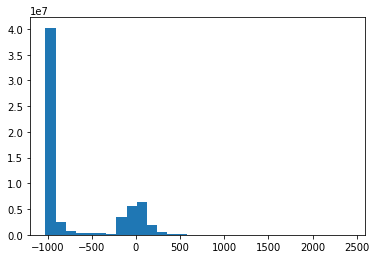

In [43]:
plt.hist((arr.reshape(-1)), bins=30)

(array([4.024557e+07, 2.548167e+06, 7.267830e+05, 4.146170e+05,
        3.397260e+05, 2.717920e+05, 2.407270e+05, 3.512073e+06,
        5.634089e+06, 6.358189e+06, 1.821364e+06, 4.578790e+05,
        1.548390e+05, 7.304200e+04, 4.375100e+04, 2.768800e+04,
        1.945100e+04, 1.373800e+04, 8.277000e+03, 2.616000e+03,
        9.800000e+01, 1.800000e+01, 1.800000e+01, 1.300000e+01,
        1.300000e+01, 1.000000e+01, 5.000000e+00, 2.000000e+00,
        4.000000e+00, 1.000000e+00]),
 array([0.        , 0.03280952, 0.06561905, 0.09842857, 0.1312381 ,
        0.16404762, 0.19685714, 0.22966667, 0.26247619, 0.29528571,
        0.32809524, 0.36090476, 0.39371429, 0.42652381, 0.45933333,
        0.49214286, 0.52495238, 0.5577619 , 0.59057143, 0.62338095,
        0.65619048, 0.689     , 0.72180952, 0.75461905, 0.78742857,
        0.8202381 , 0.85304762, 0.88585714, 0.91866667, 0.95147619,
        0.98428571]),
 <BarContainer object of 30 artists>)

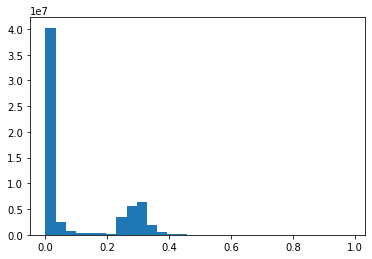

In [45]:
plt.hist((arr.reshape(-1) - arr.min())/3500, bins=30)

(array([ 142409.,  129415.,  112663.,  102620.,  103134.,  115130.,
         149700., 4161989., 2999520., 1487331., 2473429., 2954124.,
        1870957.,  837530.,  420787.,  229682.,  141499.,   92324.,
          53409.,  204454.]),
 array([-4.99900e+02, -4.49905e+02, -3.99910e+02, -3.49915e+02,
        -2.99920e+02, -2.49925e+02, -1.99930e+02, -1.49935e+02,
        -9.99400e+01, -4.99450e+01,  5.00000e-02,  5.00450e+01,
         1.00040e+02,  1.50035e+02,  2.00030e+02,  2.50025e+02,
         3.00020e+02,  3.50015e+02,  4.00010e+02,  4.50005e+02,
         5.00000e+02]),
 <BarContainer object of 20 artists>)

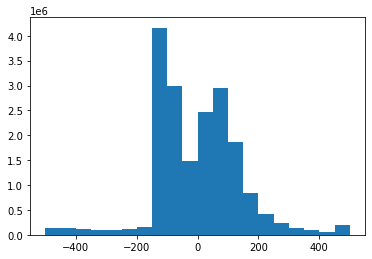

In [29]:
arr2 = arr > 500
arr3 = arr < -500
arr1 = arr.copy()
arr1[arr2] = 500
arr1[arr3] = -500

plt.hist(arr1.reshape(-1), bins=20, range=(arr1.min()+.1,arr1.max()))

-0.6179586615810402 3.5249131290836613


(array([ 132001.,  119437.,  105606.,   98745.,  104195.,  116731.,
         335822., 5328545., 2009237., 1488204., 2666290., 2942028.,
        1438732.,  758666.,  385088.,  205669.,  133881.,   88370.,
          51638.,  203576.]),
 array([-0.51795866, -0.31581507, -0.11367148,  0.08847211,  0.2906157 ,
         0.49275929,  0.69490288,  0.89704647,  1.09919005,  1.30133364,
         1.50347723,  1.70562082,  1.90776441,  2.109908  ,  2.31205159,
         2.51419518,  2.71633877,  2.91848236,  3.12062595,  3.32276954,
         3.52491313]),
 <BarContainer object of 20 artists>)

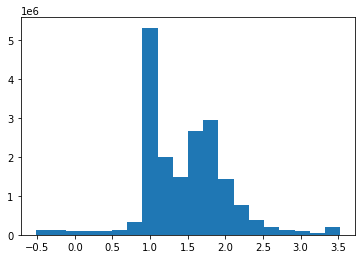

In [32]:
arr_norm = (arr1 - arr1.mean()) / arr1.std()
print(arr_norm.min(), arr_norm.max())
plt.hist(arr_norm.reshape(-1), bins=20, range=(arr_norm.min()+0.1,arr_norm.max()))

-1.0 1.0


(array([ 124761.,  107265.,   99384.,   95723.,  106849.,  122156.,
        1615631., 4827084., 1587559., 1579285., 2751242., 2864200.,
        1100363.,  665902.,  345255.,  189158.,  125588.,   82292.,
          50052.,  202651.]),
 array([-0.9  , -0.805, -0.71 , -0.615, -0.52 , -0.425, -0.33 , -0.235,
        -0.14 , -0.045,  0.05 ,  0.145,  0.24 ,  0.335,  0.43 ,  0.525,
         0.62 ,  0.715,  0.81 ,  0.905,  1.   ]),
 <BarContainer object of 20 artists>)

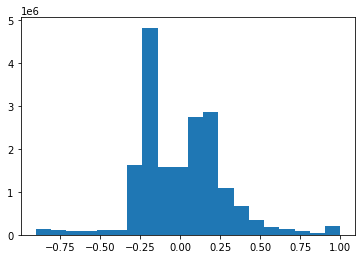

In [39]:
arr_center = 2 * (arr1 - arr1.min()) / (arr1.max() - arr1.min()) -1
print(arr_center.min(), arr_center.max())
plt.hist(arr_center.reshape(-1), bins=20, range=(arr_center.min()+0.1,arr_center.max()))

In [100]:
pooled_height = 12
pooled_width = 10

region = np.arange(30).reshape([6,5]) + 1
region_height = region.shape[0]
region_width = region.shape[1]

h_step = region_height / pooled_height
w_step = region_width / pooled_width

areas = [[
        (
            w * w_step,
            h * h_step,
            (w+1) * w_step if (w+1) < pooled_width else region_width,
            (h+1) * h_step if (h+1) < pooled_height else region_height,
        ) 
        for w in range(pooled_width)
    ]
    for h in range(pooled_height)
]
areas = np.asarray(areas, dtype=np.int)
areas


array([[[0, 0, 0, 0],
        [0, 0, 1, 0],
        [1, 0, 1, 0],
        [1, 0, 2, 0],
        [2, 0, 2, 0],
        [2, 0, 3, 0],
        [3, 0, 3, 0],
        [3, 0, 4, 0],
        [4, 0, 4, 0],
        [4, 0, 5, 0]],

       [[0, 0, 0, 1],
        [0, 0, 1, 1],
        [1, 0, 1, 1],
        [1, 0, 2, 1],
        [2, 0, 2, 1],
        [2, 0, 3, 1],
        [3, 0, 3, 1],
        [3, 0, 4, 1],
        [4, 0, 4, 1],
        [4, 0, 5, 1]],

       [[0, 1, 0, 1],
        [0, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 2, 1],
        [2, 1, 2, 1],
        [2, 1, 3, 1],
        [3, 1, 3, 1],
        [3, 1, 4, 1],
        [4, 1, 4, 1],
        [4, 1, 5, 1]],

       [[0, 1, 0, 2],
        [0, 1, 1, 2],
        [1, 1, 1, 2],
        [1, 1, 2, 2],
        [2, 1, 2, 2],
        [2, 1, 3, 2],
        [3, 1, 3, 2],
        [3, 1, 4, 2],
        [4, 1, 4, 2],
        [4, 1, 5, 2]],

       [[0, 2, 0, 2],
        [0, 2, 1, 2],
        [1, 2, 1, 2],
        [1, 2, 2, 2],
        [2, 2, 2, 2],
  